# DSCI 100 Project: Predicting Usage of a Video Game Research Server

## (1) Data Description

#### Load necessary libraries

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Load players.csv dataset

In [2]:
url <- ("https://raw.githubusercontent.com/msyr125/dsci-project/refs/heads/main/players.csv")
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


The dataset players.csv contains information about individual Minecraft players collected by a UBC research group studying player behaviour. It included demographic data, playtime, and experience level for each player, along with whether they subscribed to a game-related newsletter. 
- Number of observations: 196 players
- Number of variables: 7
- File name: players.csv

| Variable Name | Type | Description | Example Value |
|:--------------|:----:|:-----------:|:-------------:|
| experience | chr | Player's experience level (e.g. "Beginner", "Amateur", "Regular", "Pro", "Veteran") | "Pro" |
| subscribe | lgl | Whether the player subscribed to the newsletter (TRUE = subscribed, FALSE = not subscribed) | TRUE |
| hashedEmail | chr | Anonymized email identifier (used for unique player identification) | "f19e136ddd..." |
| played_hours | dbl | Total hours the player spent playing on the server | 30.3 |
| name | chr | Player's in-game name | "Morgan" |
| gender | chr | Player's gender, typically "Male" or "Female" (also includes "Other", "Prefer not to say", "Two-Spirited", "Agender", and "Non-binary") | "Male" | 
| Age | dbl | Player's age in years | 21 |

In [3]:
players |>
  summarize(
    mean_hours = round(mean(played_hours, na.rm = TRUE), 2),
    median_hours = round(median(played_hours, na.rm = TRUE), 2),
    min_hours = round(min(played_hours, na.rm = TRUE), 2),
    max_hours = round(max(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = round(min(Age, na.rm = TRUE), 2),
    max_age = round(max(Age, na.rm = TRUE), 2)
  )

mean_hours,median_hours,min_hours,max_hours,mean_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,0,223.1,21.14,9,58


In [4]:
players |>
    count(subscribe) 

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


Observations and Potential Issues
- There are 196 total players and 194 recorded ages, meaning two missing age values
- The played_hours variable is highly skewed. Most players have very low playtime, but a few have extremely high values (such as 223 hours)
- The gender variable may have imbalanced categories, which could affect model performance
- The hashedEmail variable is not needed for prediction
- The gender and experience variables should be changed from a chr (character) variable type to a fct (factor) variable type so R knows it is a category, not just text, and can use it properly when trying to predict something
- The Age variable can be changed into an int (integer) variable type as a general integer will suffice for the research we are conducting (no need for decimals in age)
- The data likely comes from server logs and player registration forms, so potential unseen issues may include inaccurate self-reported data (age, gender) and inactive accounts inflating counts

#### Load sessions.csv dataset

In [5]:
url <- ("https://raw.githubusercontent.com/msyr125/dsci-project/refs/heads/main/sessions.csv")
sessions <- read_csv(url)
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


The dataset sessions.csv records individual game sessions for players, identified by a hashed email. 
- Number of observations: 1535
- Number of variables: 5
- File name: sessions.csv

| Variable Name | Type | Description | Example Value |
|:--------------|:----:|:-----------:|:-------------:|
| hashedEmail | chr | Anonymized player identifier | 36d9cbb4c6bc... |
| start_time | chr | Time session started (DD/MM/YYYY HH:MM) | 28/06/24 01:31 |
| end_time | chr | Time session ended (DD/MM/YYYY HH:MM) | 27/06/24 23:04 |
| original_start_time | dbl | Unix timestamp version of start time | 1.71617e+12 |
| original_end_time | dbl | Unix timestamp version of end time | 1.719196e+12 |

In [6]:
summary_stats <- sessions |>
  summarize(
    mean_start   = round(mean(original_start_time, na.rm = TRUE), 2),
    min_start    = round(min(original_start_time, na.rm = TRUE), 2),
    max_start    = round(max(original_start_time, na.rm = TRUE), 2),
    sum_start    = round(sum(original_start_time, na.rm = TRUE), 2),
    median_start = round(median(original_start_time, na.rm = TRUE), 2),
    mean_end     = round(mean(original_end_time, na.rm = TRUE), 2),
    min_end      = round(min(original_end_time, na.rm = TRUE), 2),
    max_end      = round(max(original_end_time, na.rm = TRUE), 2),
    sum_end      = round(sum(original_end_time, na.rm = TRUE), 2),
    median_end   = round(median(original_end_time, na.rm = TRUE), 2)
  )
summary_stats

mean_start,min_start,max_start,sum_start,median_start,mean_end,min_end,max_end,sum_end,median_end
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.7124e+12,1.72733e+12,2.638974e+15,1.7192e+12,1.719196e+12,1.7124e+12,1.72734e+12,2.635527e+15,1.71918e+12


Observations and Potential Issues
- The variables start_time and end_time are stored as text strings instead of data-time objects, which will need conversion
- There are possibly duplicate players, as the same hashedEmail could show up repeatedly

## (2) Questions

In this project, the one broad question I have selected to research is Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player type?  

My specific question that I created is: Can a player's age, gender, hours played, and experience level predict whether or not they subscribe to the newsletter?  

The dataset includes player features to predict newsletter subscription (newsletter_sub: yes/no).  
Player features cover demographics and gameplay, while session features capture engagement patterns.  
Data will be cleaned and tidied using tidyverse: selecting relevant variables, creating new features (e.g., avg_session_length, num_sessions), renaming for consistency, and aggregating session data by player. Missing values will be imputed, and numeric variables scaled via tidymodels to prepare for KNN.  
Data will be split into training, validation, and test sets with a fixed seed, and cross-validation will tune k for optimal accuracy. Visualization (bar plots, histograms, scatter plots) will explore patterns between subscribers and non-subscribers. Model evaluation will use accuracy, precision, recall, and confusion matrices.  
This provides a complete classification workflow—from data wrangling and visualization to KNN modeling and performance assessment.

## (3) Exploratory Data Analysis and Visualization

#### Load the dataset again

In [7]:
url <- ("https://raw.githubusercontent.com/msyr125/dsci-project/refs/heads/main/players.csv")
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Turn data into tidy format

In [8]:
players <- players |>
mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe),
    Age = as.integer(Age)
    )
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### Compute the mean value for each quantative variable in the players.csv dataset

In [9]:
players |>
  summarize(
    mean_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE)
    )

mean_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


#### Create exploratory visualizations of the data

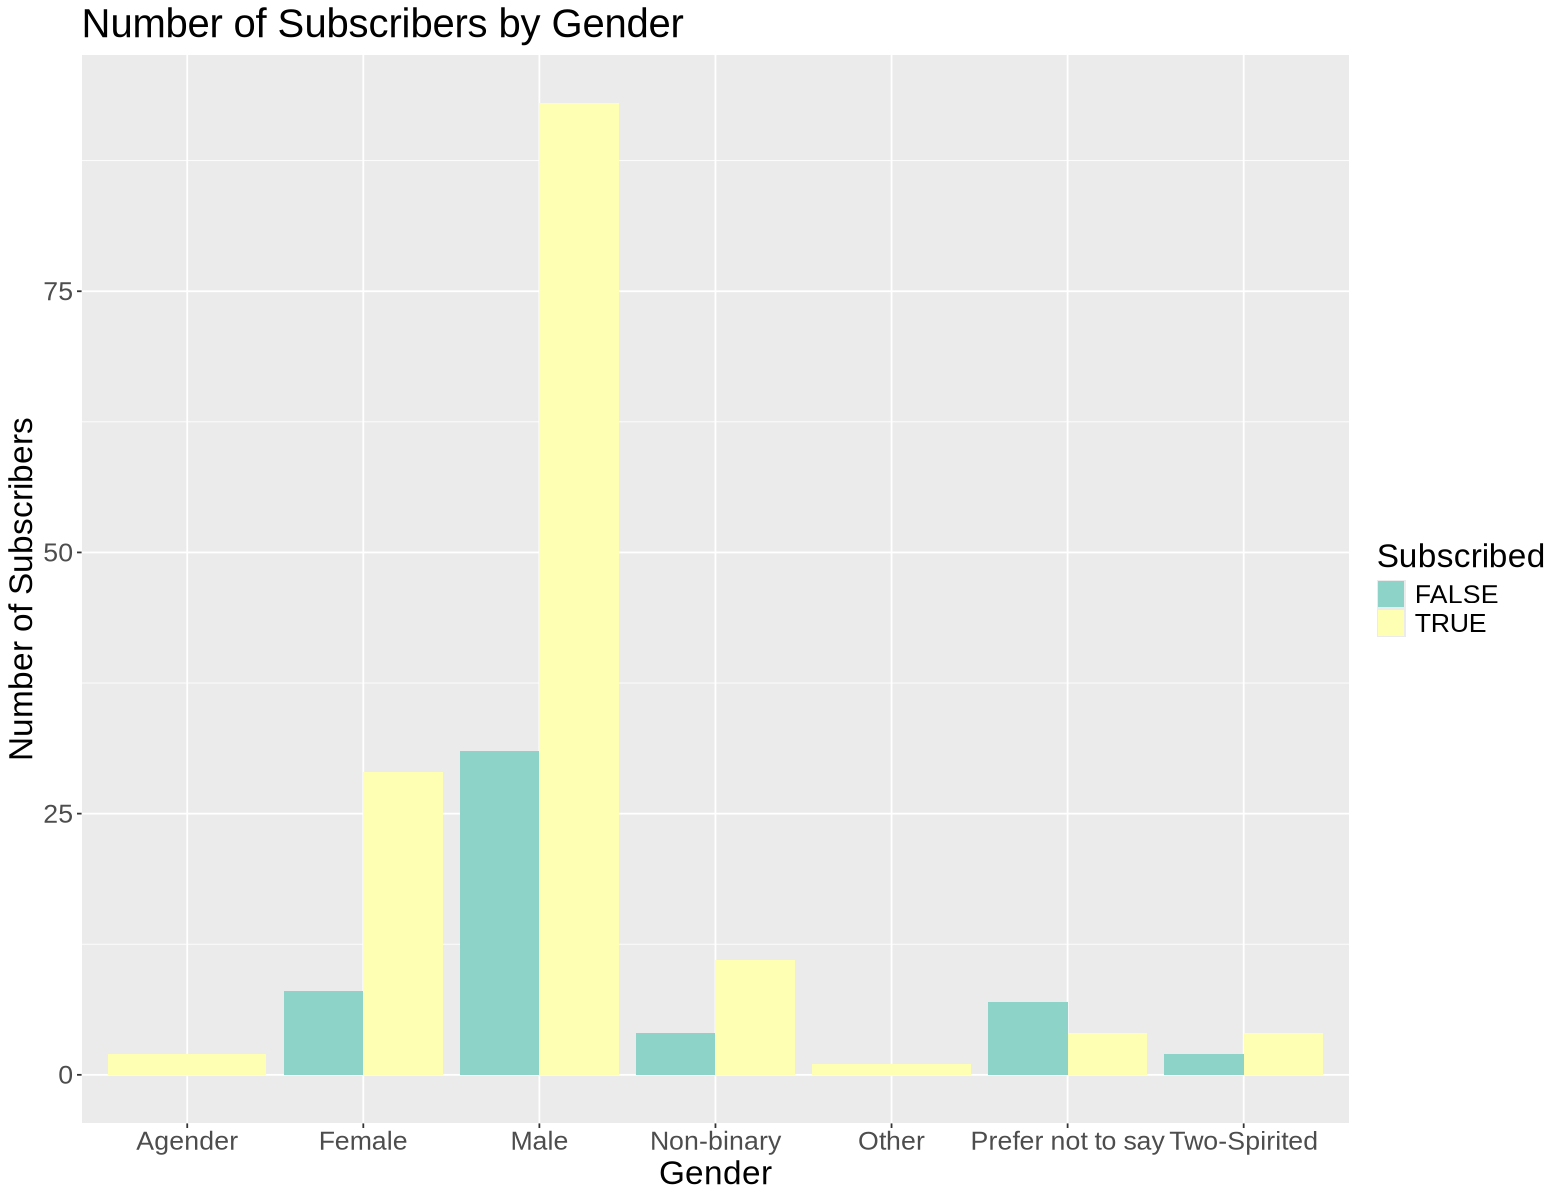

In [10]:
options(repr.plot.height = 10, repr.plot.width = 13)

gender_subs_plot <- players |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "dodge") + 
    scale_fill_brewer(palette = "Set3") +
    labs(
        x = "Gender", 
        y = "Number of Subscribers", 
        fill = "Subscribed"
        ) +
    ggtitle("Number of Subscribers by Gender") + 
    theme(text = element_text(size = 20)) 
gender_subs_plot

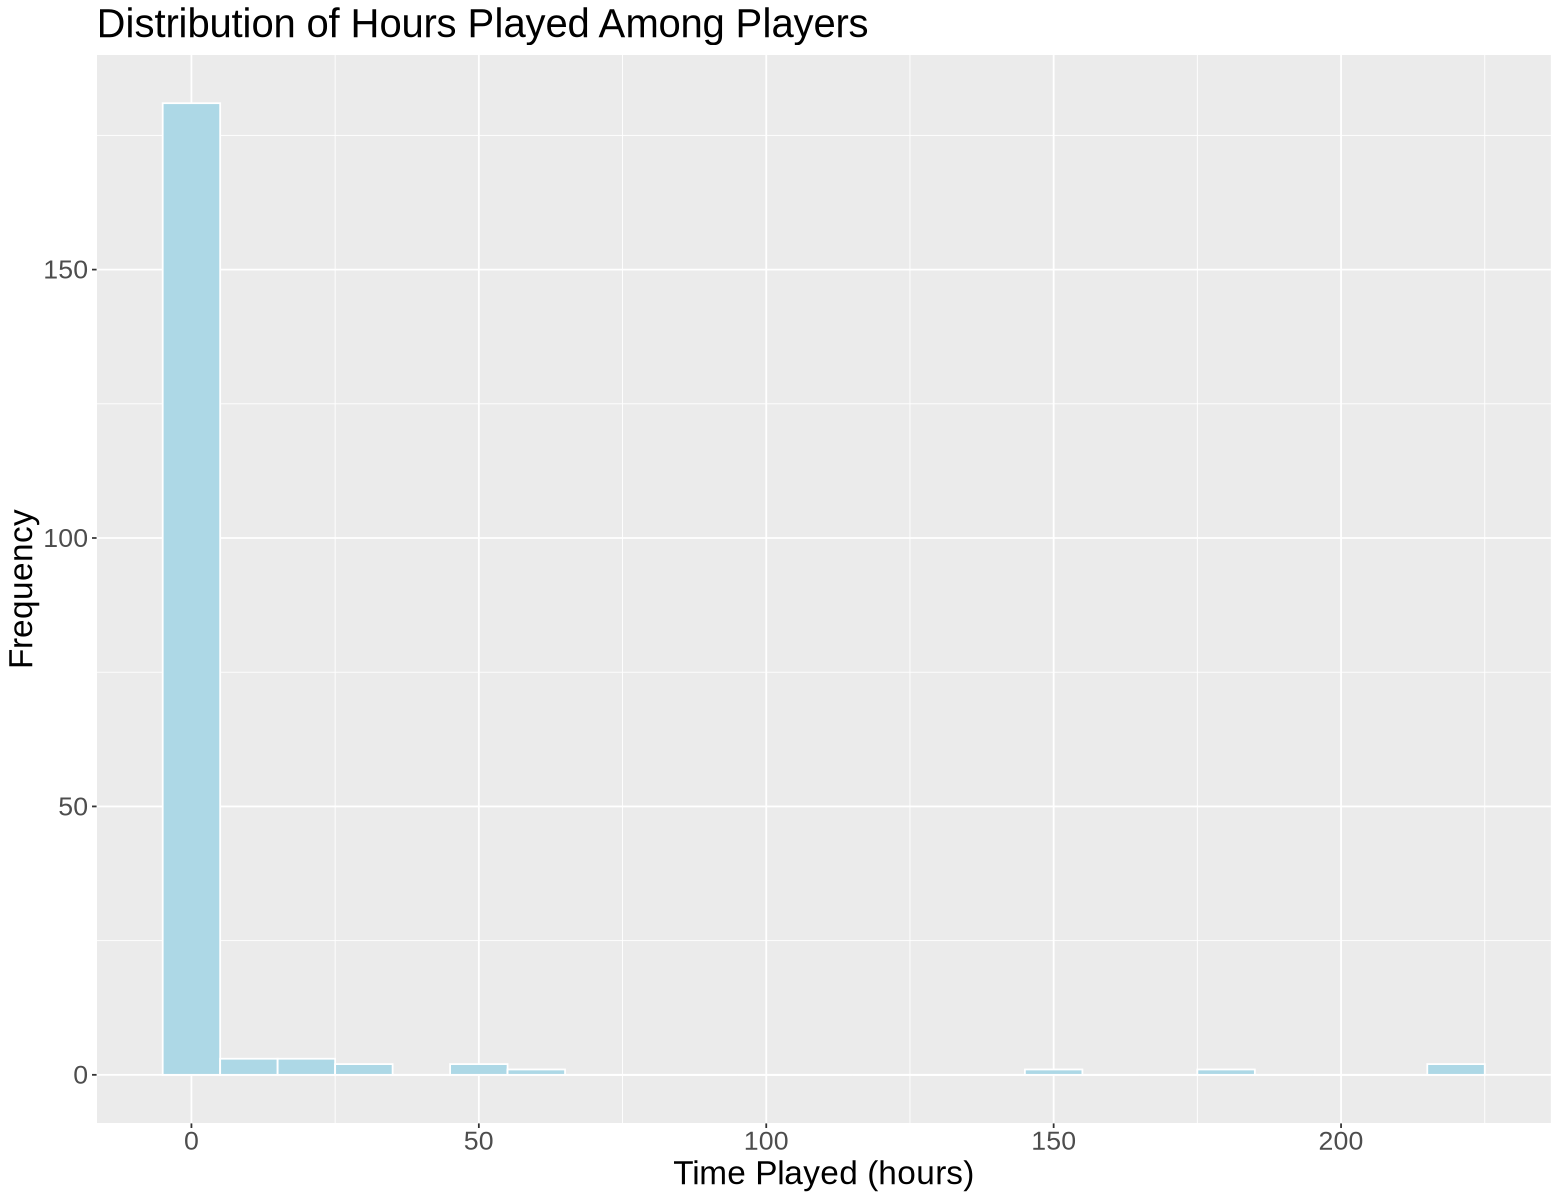

In [11]:
played_hours_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 10, fill = "lightblue", colour = "white") +
    labs(
        x = "Time Played (hours)",
        y = "Frequency"
        ) +
    ggtitle("Distribution of Hours Played Among Players") +
    theme(text = element_text(size = 20))
played_hours_plot

From the gender_subs_plot visualization, we can see that subscription rates are much higher in males than females, suggesting gender may be a strong distinguishing factor. The played_hours_plot visualization shows that most players have fewer hours, with a few having much higher playtime, which could affect how the data is interpreted.